# Homework 6 - Women and children first?!

The objective of this homework is to practice simple decision trees. To successfully complete this homework, you may use any resources available to you. 

Get the `titanic3.csv` data (Source: [Link](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt).

1. Analyze the data using pandas.
    * Create a column that specifies whether the person is a child (age <= 10)
    * Group the data by `sex`, `child`, `pclass` and interpret the survival rate.
2. Develop a decision tree with depth of 1.
    * Preprocess the `sex` column using LabelEncoder
    * Develop the decision tree
    * Visually reproduce the decision tree using a seaborn barchart.
    * Use the t-test from scipy.stats to statistically reproduce the decision.
    * Interpret the decision tree.
3. Develop a decision tree with depth of 2.
    * Develop the decision tree
    * Visually reproduce the decision tree using seaborn barcharts (left side and right side)
    * Use the ranksums test from scipy.stats to statistically reproduce the decisions.
    * Interpret the decision tree. 
    
Hints:
* Explain what you are doing.
* Use references.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
%matplotlib inline

In [5]:
tc = pd.read_csv("titanic3.csv")

In [6]:
tc.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

## Description of the dataset

Each row is a passenger on the Titanic. The columns report attributes for the passengers:

| Column | Description | Relevant for this homework|
|--------|-------------|--------|
|`survived`|1 = survived, 0 = died | **X**|
|`pclass`| 1 = first class, 2 = second class, 3 = third class |**X**|
|`name`| Name of the passenger| |
|`sex`| male or female|**X**|
|`age`| age in years|**X**|
|`sibsp`| The number of siblings or spouses that are also traveling on the Titanic| |
|`parch`| The number of parents or childen that are also traveling on the Titanic| |
|`ticket`|The ticket number| |
|`fare`| The ticket price | |
|`cabin`| The cabin number | |
|`embarked`| The starting city | |
|`boat`| The emergency boat number | |
|`body`| The identification number of the body | |
|`home.dest`| The destination of the passenger | |

In [7]:
tc['survived'].mean()

0.3819709702062643

In [10]:
len(tc[(tc['sex']=='female') & (tc['survived']==1)])/len(tc[tc['sex']=='female'])

0.7274678111587983

## Women and children first?

### Create a column that specifies whether the person is a child (10 years or younger)


In [39]:
tc['child'] = tc['age'] <= 10

### Group the data by `sex`, `child`, `pclass` and interpret the survival rate.

In [40]:
tc.groupby(['sex','child','pclass'])['survived'].agg({'mean', 'count'}).sort_values(by='mean', ascending=False)

mean  count
sex    child pclass                 
female True  2.0     1.000000     11
male   True  1.0     1.000000      3
             2.0     1.000000     11
female False 1.0     0.972028    143
             2.0     0.873684     95
             3.0     0.491979    187
       True  3.0     0.482759     29
male   True  3.0     0.354839     31
       False 1.0     0.329545    176
             3.0     0.138528    462
             2.0     0.087500    160
female True  1.0     0.000000      1

## Decision Tree with depth of 1

### Restrict your analysis on the relevant columns (check table above).

In [41]:
t = tc[['survived', 'pclass', 'sex', 'age']].copy()

### Preprocess the `sex` column

In [42]:
t['sex'] = pp.LabelEncoder().fit_transform(t['sex'].astype(str))

### Clean the dataset

In [43]:
t.dropna(inplace=True)

### Build the decision tree

**Build** and **visualize** a decision tree with depth of 1 (i.e., one root and two leaf nodes) to find differences between passengers who survived and those who did not. 

In [44]:
X= t.drop('survived',axis=1)

In [45]:
Y = t['survived']

In [46]:
dt_one = tree.DecisionTreeClassifier(max_depth=1)

In [47]:
dt_one.fit(X,Y)
dt_one.score(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.7791586998087954

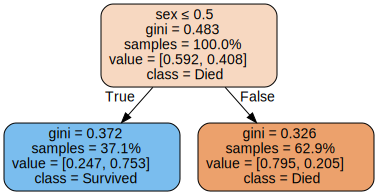

In [49]:
import graphviz
dot_data = tree.export_graphviz(dt_one, out_file=None, 
                         feature_names=list(X.columns),  
                         class_names = ['Survived' if i == 1 else 'Died' for i in dt_one.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph 

### Visually reproduce the decision tree using a seaborn factorplot.


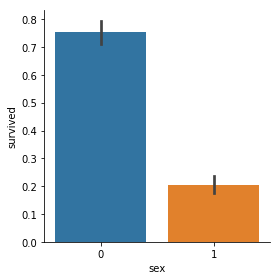

In [50]:
import seaborn as sns
sns.factorplot(x='sex',y='survived',data=t,kind='bar');

### Use the t-test from `scipy.stats` to statistically reproduce the decision.

In [51]:
from scipy.stats import ttest_ind

f = t[t['sex']==0]['survived']
m = t[t['sex']==1]['survived']

ttest_ind(f, m)

Ttest_indResult(statistic=20.622130510238705, pvalue=1.566605331038222e-79)

## Develop a decision tree with depth of 2

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 2</b> to find the differences between those who survived and those who didn't. Your tree should have four leaves.

In [52]:
dt_two = tree.DecisionTreeClassifier(max_depth = 2)
dt_two.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

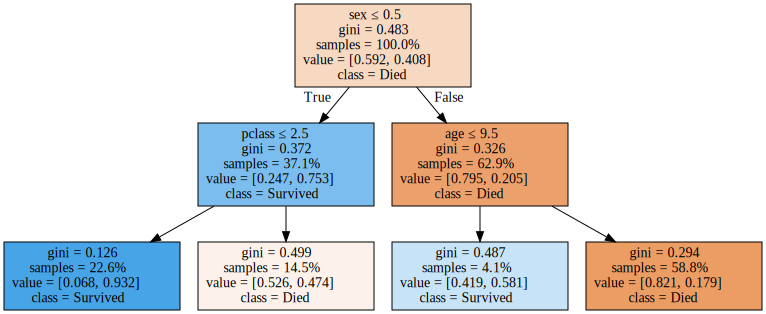

In [53]:
dot_data = tree.export_graphviz(dt_two, out_file=None, 
                         feature_names=list(X.columns),  
                         class_names = ['Survived' if i == 1 else 'Died' for i in dt_two.classes_] ,
                         filled=True, 
                         special_characters=True,
                               proportion=True)  
graph = graphviz.Source(dot_data)  
graph 

###  Visually reproduce the left side of the decision tree using seaborn barcharts

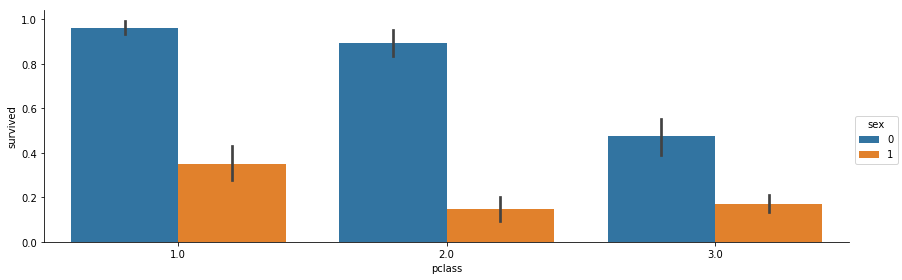

In [54]:
sns.factorplot(x='pclass',y='survived',hue = 'sex', data=t,aspect = 3,kind='bar')

### Use the ranksums test from scipy.stats to statistically reproduce the decision on the left side.


In [55]:
from scipy.stats import f_oneway, ranksums

f_first = t[(t['pclass']==1) & (t['sex'] == 0) ]['survived']
f_second = t[(t['pclass']==2) & (t['sex'] == 0) ]['survived']
f_third = t[(t['pclass']==3) & (t['sex'] == 0) ]['survived']

f_oneway(f_first, f_second, f_third)

ranksums(f_first, f_second)
ranksums(f_first, f_third)
ranksums(f_second, f_third)

F_onewayResult(statistic=72.24579903597308, pvalue=2.2820168614374938e-27)

RanksumsResult(statistic=0.9112768945328199, pvalue=0.36214949741501345)

RanksumsResult(statistic=7.116835718867666, pvalue=1.1043298080716469e-12)

RanksumsResult(statistic=5.682420683900446, pvalue=1.3280150786907215e-08)

###  Visually reproduce the right side of the decision tree using seaborn barcharts

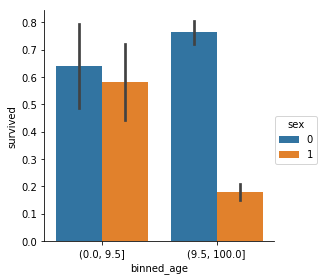

In [56]:
t['binned_age'] = pd.cut(t['age'],bins=[0,9.5,100])
sns.factorplot(x='binned_age', y='survived',hue='sex', data=t,kind='bar')

### Use the ranksums test from scipy.stats to statistically reproduce the decisions on the right side.


In [57]:
c_f = t[(t['age']<=9.5) & (t['sex'] == 0) ]['survived']
c_m = t[(t['age']<=9.5) & (t['sex'] == 1) ]['survived']
a_f = t[(t['age']>9.5) & (t['sex'] == 0) ]['survived']
a_m = t[(t['age']>9.5) & (t['sex'] == 1) ]['survived']

ranksums(c_f, c_m)
ranksums(a_f, a_m)


RanksumsResult(statistic=0.464253353875546, pvalue=0.6424662395629337)

RanksumsResult(statistic=15.141856333434648, pvalue=8.575840678111461e-52)